## DO NOT ALTER THE CODE FROM HERE THROUGH PLOTTING

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sbn
from scipy import stats

In [2]:
# Importing the cleaned/combined data from the csv with the years 2008-2018

firefile = './output/all_with_no_incident_nulls.csv'
df = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8')
len(df)


C:\Users\jills\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


159803

In [3]:
df['arrive_date_time'] = pd.to_datetime(df['arrive_date_time'])
df['cleared_date_time'] = pd.to_datetime(df['cleared_date_time'])
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df.dtypes

OBJECTID                              int64
address                              object
address2                             object
apt_room                             object
arrive_date_time             datetime64[ns]
cleared_date_time            datetime64[ns]
dispatch_date_time           datetime64[ns]
exposure                              int64
incident_number                      object
incident_type                       float64
incident_type_description            object
platoon                              object
station                             float64
Longitude                            object
Latitude                             object
Year                                float64
Date                                 object
dtype: object

In [4]:
# The total number of rows with the years 2008-2018 and incident type not null
len(df['dispatch_date_time'].unique())

154071

In [5]:
df.groupby('Year')['OBJECTID'].count()

Year
2008.0    13705
2009.0    13028
2010.0    13531
2011.0    13893
2012.0    13607
2013.0    13943
2014.0    14415
2015.0    15130
2016.0    15746
2017.0    18151
2018.0    14654
Name: OBJECTID, dtype: int64

In [6]:
# Calculating the time from dispatch to cleared in minutes and in seconds
df['Arr Time'] = (df['arrive_date_time'] - df['dispatch_date_time'])
df['Arr Time'] = pd.to_timedelta(df['Arr Time'])
df['Seconds'] = df['Arr Time'].dt.total_seconds()


In [7]:
df = df.loc[df['station']!=13.0]
len(df)

159801

## Start any plotting from here

In [8]:
# There appear to be some funky clearance times, possibly human error
outlier = df.loc[df['Arr Time']==df['Arr Time'].max()]
no_outliers = df[df['Arr Time'] <= df['Arr Time'].mean() + 3 * df['Arr Time'].std()]
len(no_outliers)

129701

In [9]:
raw_year = df.groupby(['Year']).OBJECTID.count()

In [10]:
years = no_outliers.groupby(['Year']).OBJECTID.count()

In [11]:
diff = raw_year - years
diff #<-- This represents the number of arrival times that were considered outliers per year

Year
2008.0    1823
2009.0    2106
2010.0    2353
2011.0    2541
2012.0    2630
2013.0    2872
2014.0    2892
2015.0    3074
2016.0    3188
2017.0    3732
2018.0    2889
Name: OBJECTID, dtype: int64

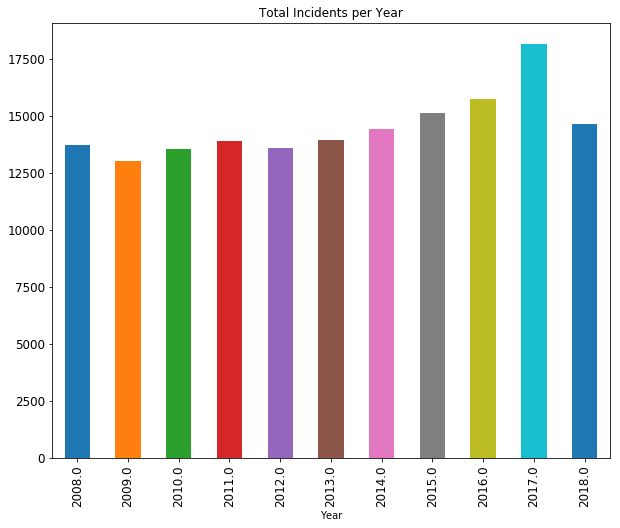

In [12]:
raw_year.plot(kind='bar', figsize=(10,8), use_index=True, title='Total Incidents per Year', grid=False,fontsize=12)
plt.savefig('./graphics/total_fi_year_withoutliers.png')

In [13]:
# ### Trying to get at what stations were in the dataset per year
# sl = no_outliers.groupby('station')['Year'].unique()
# # sl.sort()
# sl
# # It looks like station 0 is a mistake, stage 13 only has records from 2008 and not listed on Wake Co FD list
# # Station 29 came online in 2015

In [14]:
df['incident_type'].unique()

array([ 150.,  510.,  440.,  561.,  520.,  531.,  554.,  700.,  511.,
        500.,  611.,  111.,  100.,  444.,  735.,  422.,  445.,  743.,
        424.,  710.,  746.,  622.,  131.,  652.,  480.,  421.,  412.,
        551.,  736.,  741.,  651.,  461.,  151.,  600.,  143.,  251.,
        550.,  141.,  745.,  814.,  113.,  142.,  911.,  522.,  730.,
        740.,  733.,  463.,  813.,  140.,  900.,  744.,  112.,  553.,
        552.,  631.,  154.,  442.,  411.,  400.,  160.,  671.,  162.,
        118.,  441.,  711.,  713.,  420.,  443.,  413.,  152.,  621.,
        410.,  153.,  734.,  155.,  540.,  130.,  812.,  116.,  653.,
        715.,  800.,  200.,  170.,  240.,  121.,  731.,  221.,  714.,
        650.,  542.,  571.,  815.,  460.,  521.,  632.,  161.,  555.,
        423.,  220.,  114.,  641.,  451.,  132.,  138.,  210.,  223.,
        481.,  742.,  721.,  751.,  512.,  163.,  732.,  211.,  123.,
        134.,  120.,  164.,  482.,  173.,  137.,  672.,  541.,  115.,
        471.,  172.,

In [15]:
df['incident_type'].value_counts()

611.0     37284
700.0     11933
500.0      9925
745.0      9811
743.0      9760
740.0      5625
622.0      5330
744.0      3948
733.0      3715
735.0      3556
730.0      2836
531.0      2794
111.0      2523
511.0      2446
554.0      2427
551.0      2205
412.0      2183
510.0      2176
131.0      2084
440.0      2010
463.0      1864
444.0      1776
113.0      1740
651.0      1412
522.0      1338
445.0      1302
550.0      1287
142.0      1246
710.0      1158
600.0      1005
          ...  
541.0        12
540.0        12
240.0        11
815.0        10
153.0         9
163.0         9
220.0         9
223.0         8
123.0         8
120.0         8
471.0         7
137.0         7
117.0         6
134.0         4
212.0         4
173.0         3
164.0         3
482.0         3
712.0         2
672.0         2
243.0         2
122.0         2
751.0         2
136.0         1
110.0         1
242.0         1
172.0         1
213.0         1
9001.0        1
811.0         1
Name: incident_type, Len

In [16]:
# Create bins to group incidents, but need to figure out how this works...
bins = [99, 199, 399, 499, 599, 699, 799, 899, 9002]
labels = ["Fire", "Overpressure Rupture/Explosion (No Fire)", "Hazardous Condition (No Fire)", "Service Call", "Good Intent Call", "False Alarm and False Call", 
          "Severe Weather/Natural Disaster", "Special Incident Type"]
incident_bin=pd.cut(no_outliers["incident_type"], bins, labels=labels)
len (incident_bin)
incident_bin


0                                  Fire
1                          Service Call
2         Hazardous Condition (No Fire)
3                          Service Call
4                          Service Call
5                          Service Call
6                          Service Call
7            False Alarm and False Call
8                          Service Call
9                          Service Call
10                         Service Call
11                         Service Call
13                                 Fire
14                         Service Call
15                         Service Call
16                     Good Intent Call
17                         Service Call
18                                 Fire
19        Hazardous Condition (No Fire)
20        Hazardous Condition (No Fire)
21                         Service Call
22                     Good Intent Call
23           False Alarm and False Call
24        Hazardous Condition (No Fire)
25        Hazardous Condition (No Fire)


In [17]:
incident_bin.unique()

[Fire, Service Call, Hazardous Condition (No Fire), False Alarm and False Call, Good Intent Call, Overpressure Rupture/Explosion (No Fire), Severe Weather/Natural Disaster, Special Incident Type]
Categories (8, object): [Fire < Overpressure Rupture/Explosion (No Fire) < Hazardous Condition (No Fire) < Service Call < Good Intent Call < False Alarm and False Call < Severe Weather/Natural Disaster < Special Incident Type]

In [18]:
incident_bin.value_counts()


False Alarm and False Call                  56513
Service Call                                27640
Good Intent Call                            16912
Hazardous Condition (No Fire)               13917
Fire                                        13255
Overpressure Rupture/Explosion (No Fire)      792
Special Incident Type                         403
Severe Weather/Natural Disaster               269
Name: incident_type, dtype: int64

In [19]:
no_outliers["Incident"]=pd.cut(no_outliers["incident_type"], bins, labels=labels)
no_outliers.head()

C:\Users\jills\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
0,474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150.0,Outside rubbish fire Other,B,22.0,-78.5373,35.8916,2013.0,2013-10-19,00:05:00,300.0,Fire
1,474770,"7513 IDOLBROOK LN RALEIGH, NC 27615",NaN,,2014-02-14 21:49:00,2014-02-14 21:51:00,2014-02-14 21:46:00,0,14-0004846,510.0,Person in distress Other,A,4.0,-78.6476,35.8782,2014.0,2014-02-14,00:03:00,180.0,Service Call
2,474771,"1205 S BLOODWORTH ST RALEIGH, NC 27601",NaN,,2012-04-29 05:17:00,2012-04-29 05:38:00,2012-04-29 05:16:00,0,12-0011779,440.0,Electrical wiring/equipment problem Other,A,1.0,-78.634,35.7654,2012.0,2012-04-29,00:01:00,60.0,Hazardous Condition (No Fire)
3,474772,"7628 VALVIEW ST RALEIGH, NC 27601",NaN,,2012-04-28 23:46:00,2012-04-28 23:52:00,2012-04-28 23:43:00,0,12-9010131,561.0,Unauthorized burning,A,18.0,-78.6914,35.8844,2012.0,2012-04-28,00:03:00,180.0,Service Call
4,474773,"4201 MANGROVE DR RALEIGH, NC 27603",NaN,,2014-01-26 22:35:00,2014-01-26 22:38:00,2014-01-26 22:31:00,0,14-0002916,520.0,Water problem Other,B,28.0,-78.5166,35.8727,2014.0,2014-01-26,00:04:00,240.0,Service Call


In [20]:
total_incidents= no_outliers['Incident'].count()
total_incidents

129701

In [21]:
all_incidents = no_outliers.iloc[:, [0,15,19]]
all_incidents


,OBJECTID,Year,Incident
0,474769,2013.0,Fire
1,474770,2014.0,Service Call
2,474771,2012.0,Hazardous Condition (No Fire)
3,474772,2012.0,Service Call
4,474773,2014.0,Service Call
5,474774,2012.0,Service Call
6,474775,2011.0,Service Call
7,474776,2014.0,False Alarm and False Call
8,474777,2014.0,Service Call
9,474778,2010.0,Service Call


In [22]:
all_incidents_allyears = no_outliers.iloc[:, [15,19]]
all_incidents_allyears


,Year,Incident
0,2013.0,Fire
1,2014.0,Service Call
2,2012.0,Hazardous Condition (No Fire)
3,2012.0,Service Call
4,2014.0,Service Call
5,2012.0,Service Call
6,2011.0,Service Call
7,2014.0,False Alarm and False Call
8,2014.0,Service Call
9,2010.0,Service Call


In [23]:
#incident type percentage of total for all years combined
all_incidents_allyears_new = all_incidents_allyears.groupby(['Incident']).count()
all_incidents_allyears_new
all_incidents_allyears_new['percent']= (all_incidents_allyears_new['Year']/total_incidents)* 100
all_incidents_allyears_new

,Year,percent
Incident,,
Fire,13255,10.219659
Overpressure Rupture/Explosion (No Fire),792,0.610635
Hazardous Condition (No Fire),13917,10.730064
Service Call,27640,21.310553
Good Intent Call,16912,13.039221
False Alarm and False Call,56513,43.571753
Severe Weather/Natural Disaster,269,0.207400
Special Incident Type,403,0.310715


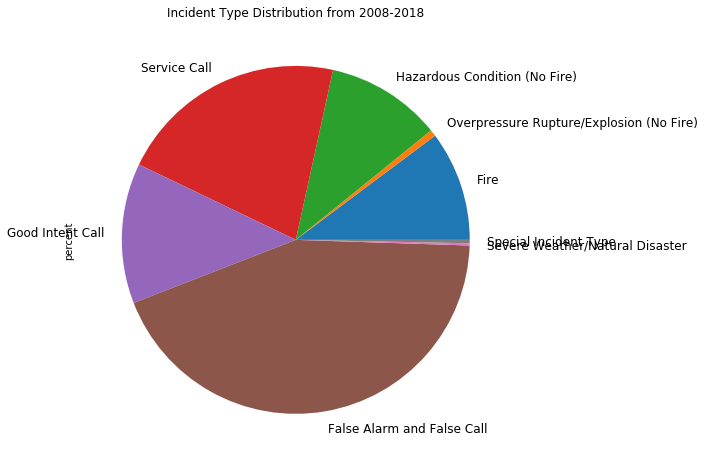

In [39]:
#plot aggregated year data by incident type
all_incidents_allyears_new.plot(kind='pie', figsize=(10,8),y= 'percent', title='Incident Type Distribution from 2008-2018', legend=False,fontsize=12)
plt.savefig('./graphics/total_incidents_allyears.png')

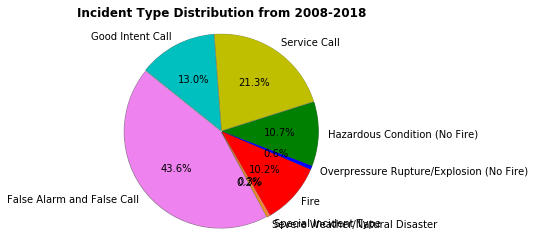

In [49]:
#code from Jarod as alternative plotting method

plt.pie(all_incidents_allyears_new['percent'],
       labels=["Fire", "Overpressure Rupture/Explosion (No Fire)", "Hazardous Condition (No Fire)", "Service Call", "Good Intent Call", "False Alarm and False Call", "Severe Weather/Natural Disaster", "Special Incident Type"],
       colors=["r","b","g","y","c","violet","orange","coral"],
       autopct='%1.1f%%',
        radius= 12,
       explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
       shadow=True, startangle=300)
plt.axis('equal')
plt.title("Incident Type Distribution from 2008-2018", fontweight='bold')

plt.savefig('./graphics/total_incidents_allyears.png')

In [51]:
all_incidents_g = all_incidents.groupby(['Incident','Year']).count().unstack()
all_incidents_g
all_incidents_g_2= all_incidents_g.add_suffix('_count').reset_index
all_incidents_g_2


<bound method DataFrame.reset_index of                                          OBJECTID_count               \
Year                                       2008.0_count 2009.0_count   
Incident                                                               
Fire                                               1436         1182   
Overpressure Rupture/Explosion (No Fire)             58           50   
Hazardous Condition (No Fire)                      1194         1185   
Service Call                                       2621         2457   
Good Intent Call                                   1582         1511   
False Alarm and False Call                         4904         4450   
Severe Weather/Natural Disaster                      26           19   
Special Incident Type                                59           68   

                                                                    \
Year                                     2010.0_count 2011.0_count   
Incident                    

In [ ]:
#trying to pivot data
all_incidents_by_year= all_incidents_g_2.pivot(index='Incident', columns= 'Year', values= 'OBJECTID_count')
all_incidents_by_year

In [ ]:
print(all_incidents['Incident'].count())

In [ ]:
# station_groups = no_outliers.groupby(['Station Group','Year'])
# station_groups['OBJECTID'].count()